# Análisis de correlación entre películas

In [29]:
# Importar las librerías requeridas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
## matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Cargar los datos obtenidos de movies.csv
df=pd.read_csv('movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

## Limpieza de datos

In [4]:
# Búsqueda de datos faltantes
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()*100)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.0041731872717787%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.22170057381324987%
runtime - 0.05216484089723526%


In [5]:
df.isnull()

name  rating  genre   year  released  score  votes  director  writer  \
0     False   False  False  False     False  False  False     False   False   
1     False   False  False  False     False  False  False     False   False   
2     False   False  False  False     False  False  False     False   False   
3     False   False  False  False     False  False  False     False   False   
4     False   False  False  False     False  False  False     False   False   
...     ...     ...    ...    ...       ...    ...    ...       ...     ...   
7663  False    True  False  False     False  False  False     False   False   
7664  False    True  False  False     False  False  False     False   False   
7665  False    True  False  False     False  False  False     False   False   
7666  False    True  False  False     False   True   True     False   False   
7667  False    True  False  False     False  False  False     False   False   

       star  country  budget  gross  company  runtime  
0     False    False   False  False    False    False  
1     False    False   False  False    False    False  
2     False    False   False  False    False    False  
3     False    False   False  False    False    False  
4     False    False   False  False    False    False  
...     ...      ...     ...    ...      ...      ...  
7663  False    False   False   True     True    False  
7664  False    False    True   True    False    False  
7665  False    False   False   True    False     True  
7666  False    False   False   True     True    False  
7667  False    False    True   True    False    False  

[7668 rows x 15 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Cómo observamos existen filas con valores nulos en atributos como: rating, released, score, votes, writer, star, country, budget, gross, company, runtime. Siendo budget el que mayor porcentaje de valores faltantes tiene con el 28.3%
Dado que son porcentajes elevados, podríamos optar por no eliminar los registro con faltantes.

In [7]:
df2 = df.dropna() # Eliminación de todas las filas que contengan un NA en cualquiera de los atributos

In [8]:
print(np.shape(df))

(7668, 15)


In [9]:
print(np.shape(df2))

(5421, 15)


In [10]:
x = len(df.index)
y = len(df2.index)
print(x - y)
print((x-y)*100/x)

2247
29.30359937402191


Si eliminaramos los registros con NA en cualquiera de sus atributos, estaríamos eliminando 2247 filas, es decir el 29.3% de los datos. Mientras tanto seguiremos trabajando con los registros sin NA.

In [11]:
# Búsqueda de datos faltantes en df2
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


Revisión de los tipos de datos de los atributos.

In [13]:
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Aquí vemos como algúnos atributos como lo son votes, budget y gross son float64 cuando realmente son int64, por lo que se decide realizar un cambio del tipo de dato a estos atributos.

In [14]:
df2.loc[:,'votes'] = df2.loc[:,'votes'].astype('int64')
df2.loc[:,'budget'] = df2.loc[:,'budget'].astype('int64')
df2.loc[:,'gross'] = df2.loc[:,'gross'].astype('int64')

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [15]:
# Validación de la actualización de los tipos de datos
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

Extracción del año de la fecha de liberación 'released'

In [16]:
df2['year_released'] = df2['released'].str.extract(pat = '([0-9]{4})').astype(int)

<ipython-input-16-0752946bc1b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year_released'] = df2['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [17]:
df2.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  year_released  
0   46998772        Warner Bros.    146.0           1980  
1   58853106   Columbia Pictures    104.0           1980  
2  538375067           Lucasfilm    124.0           1980  
3   83453539  Paramount Pictures     88.0           1980  
4   39846344      Orion Pictures     98.0           1980

Órdenar los valores por el atributo gross de manera descendente

In [18]:
df2.sort_values(by=['gross'], inplace = False, ascending = False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime  year_released  
5445  2847246203      Twentieth Century Fox    162.0           2009  
7445  2797501328             Marvel Studios    181.0           2019  
3045  2201647264      Twentieth Century Fox    194.0           1997  
6663  2069521700                  Lucasfilm    138.0           2015  
7244  2048359754             Marvel Studios    149.0           2018  
...          ...                        ...      ...            ...  
5640        5073           Two Prong Lesson     96.0           2015  
2434        2970           Trimark Pictures     97.0           1994  
3681        2554  Copperheart Entertainment    108.0           2001  
272         2270           Embassy Pictures     85.0           1982  
3203         309                   Daybreak     85.0           1997  

[5421 rows x 16 columns]

In [19]:
pd.set_option('display.max_rows', None)

In [20]:
# Establecer si hay registros duplicados y en dado caso elimianrlos
df2['company'].drop_duplicates().sort_values(ascending = False)
# Eliminar duplicados no se realiza ya que no se encuentran.
# df2['company'] = df2['company'].drop_duplicates()

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [21]:
df2.duplicated(keep = False) # Otra opción para establecer si existen registros duplicados o no
# df2.drop_duplicates() # otra opción para elimanr registros duplicados

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
17      False
18      False
20      False
21      False
22      False
23      False
28      False
29      False
33      False
35      False
36      False
37      False
42      False
46      False
48      False
50      False
51      False
53      False
56      False
57      False
58      False
75      False
77      False
80      False
92      False
94      False
95      False
96      False
97      False
98      False
99      False
100     False
101     False
103     False
105     False
106     False
108     False
110     False
112     False
113     False
114     False
115     False
117     False
118     False
119     False
120     False
121     False
122     False
126     False
127     False
128     False
129     False
130     False
131     False
132     False
133   

In [22]:
# Validación de dupliados consultando ciertas columnas
df2[df2.duplicated(['name','year_released'],keep = False)].sort_values(by=['name'], inplace = False, ascending = False)
# En este set de datos no hay peliculas repetidas por nombre y año de lanzamiento,
# las dos que se encuentran son películas diferentes

name rating     genre  year                            released  \
4212  No Good Deed      R     Crime  2002         November 20, 2014 (Germany)   
6617  No Good Deed  PG-13  Thriller  2014  September 12, 2014 (United States)   

      score  votes      director            writer               star  \
4212    5.4   7100  Bob Rafelson  Dashiell Hammett  Samuel L. Jackson   
6617    5.6  20000    Sam Miller       Aimee Lagos   Taraji P. Henson   

            country    budget     gross                   company  runtime  \
4212        Germany  12000000   1440653  ApolloMedia Distribution     97.0   
6617  United States  13200000  54323210               Screen Gems     84.0   

      year_released  
4212           2014  
6617           2014

# Análisis para buscar correlaciones entre los datos

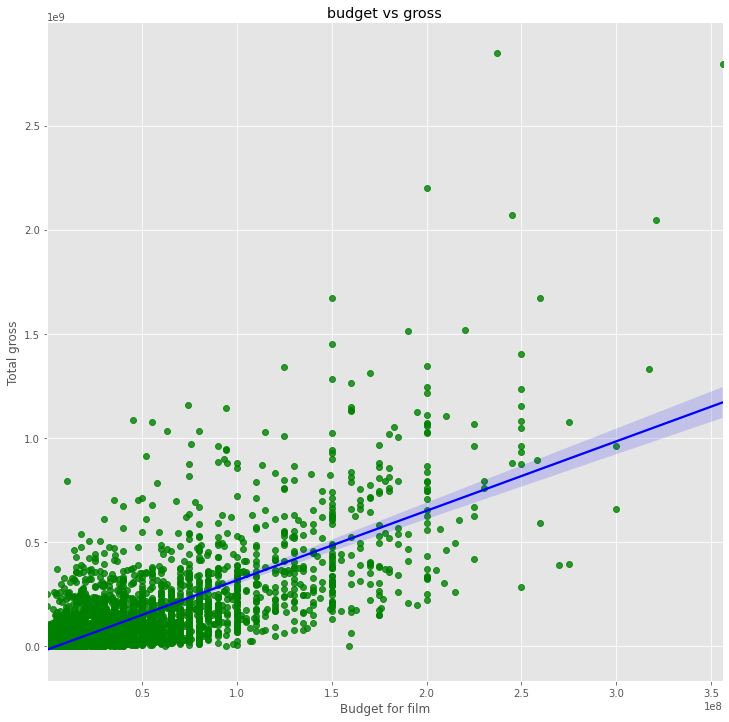

In [49]:
# Graficar budget vs gross
sns.lmplot(x='budget', y='gross', data=df2, height = 10, aspect = 1, scatter_kws={'color':'green'}, line_kws={'color':'blue'})
plt.title('budget vs gross')
plt.xlabel('Budget for film')
plt.ylabel('Total gross')
sns.color_palette("crest", as_cmap=True)
plt.show()

No parece existir una correlación clara entre los atributos budget y gross, por lo menos a partir del gráfico.

In [54]:
# Correlación ente variables cuantitativas
df2.corr(method= 'spearman') # Métodos de correlación: pearson (por defecto), kendall, spearman

year     score     votes    budget     gross   runtime  \
year           1.000000  0.057741  0.427623  0.312886  0.351045  0.095444   
score          0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155   
votes          0.427623  0.495409  1.000000  0.493461  0.745793  0.300621   
budget         0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794   
gross          0.351045  0.183192  0.745793  0.692958  1.000000  0.257400   
runtime        0.095444  0.412155  0.300621  0.330794  0.257400  1.000000   
year_released  0.998694  0.063674  0.422988  0.302535  0.340529  0.095507   

               year_released  
year                0.998694  
score               0.063674  
votes               0.422988  
budget              0.302535  
gross               0.340529  
runtime             0.095507  
year_released       1.000000

Con la información numérica de la correlación entre variables, nos es más fácil establecer que hay cierta correlación positiva entre: 
- gross y budget: 0.74 --> Esto nos quiere insinuar que existe una relación positiva entre la inversión en una película y los ingresos obtenidos.
- gross y votes: 0.61 --> Nos lleva a pensar que existe una relación positiva entre los ingresos de una película y la cantidad de personas que votan en IMDb.

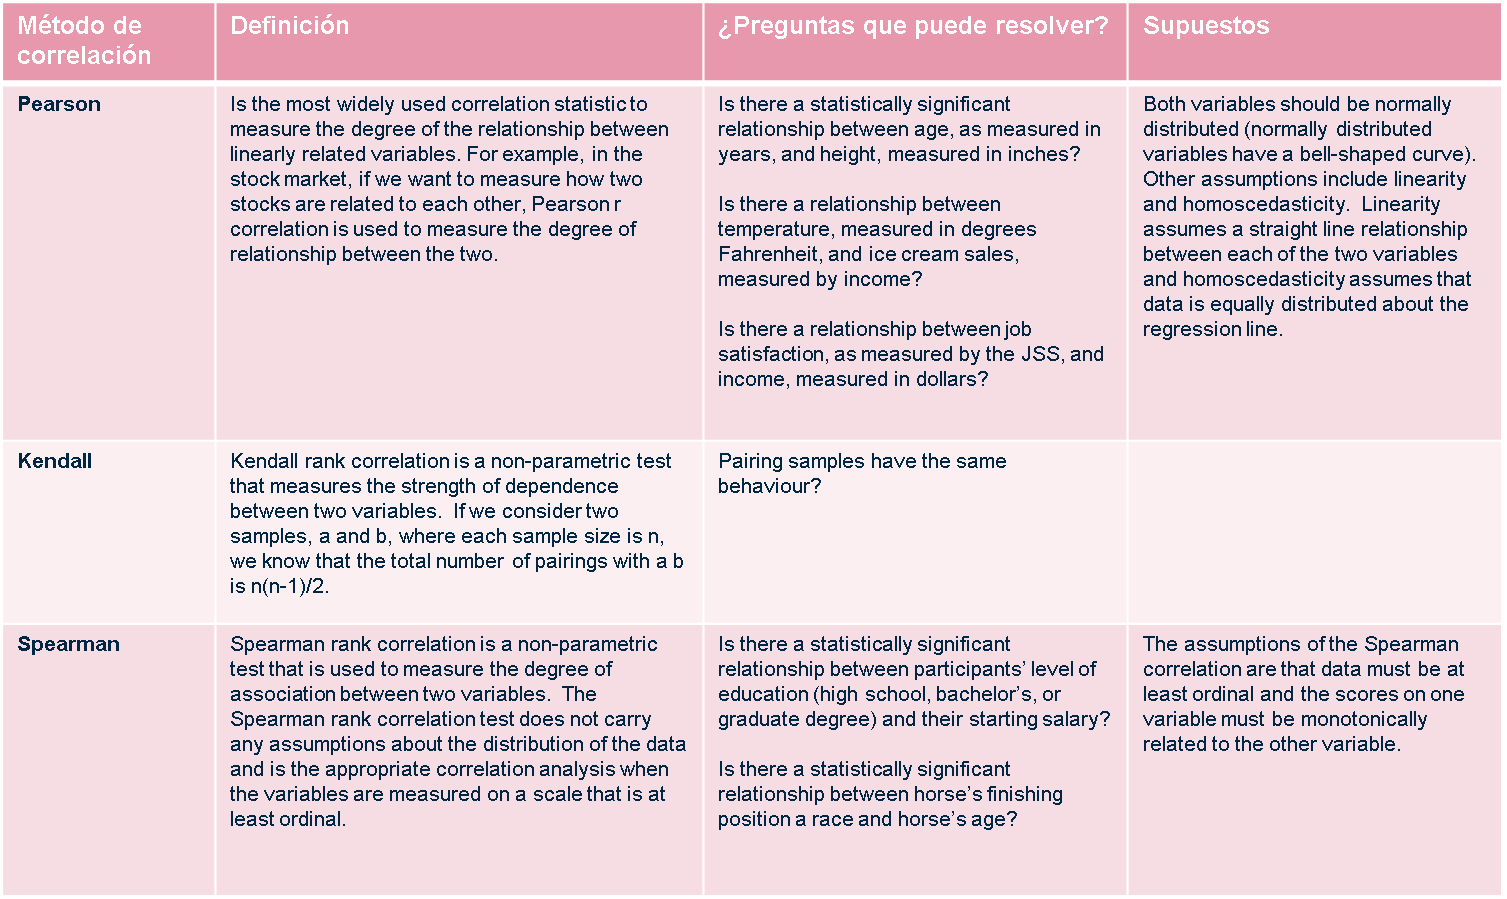

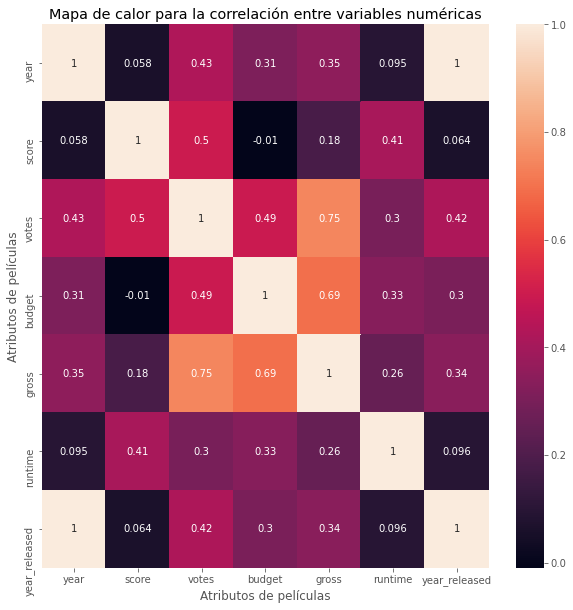

In [58]:
# Generación de mapa de calor para la correlación entre variables
matriz_correlacion = df2.corr(method='spearman')
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Mapa de calor para la correlación entre variables numéricas')
plt.xlabel('Atributos de películas')
plt.ylabel('Atributos de películas')
plt.show()

En el mapa de calor se muestra como la correlación más alta se da para las parejas de variables:
- gross y votes
- gross y budget

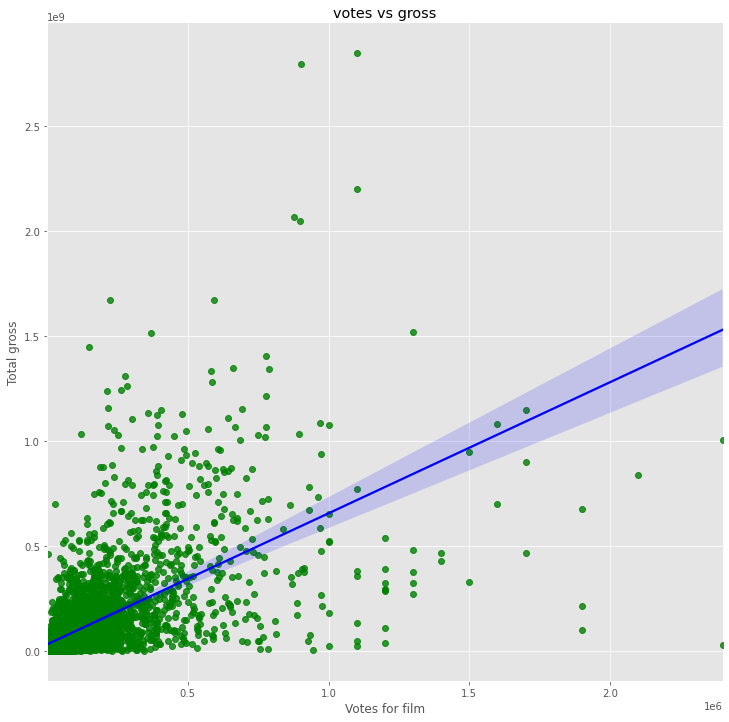

In [77]:
# Graficar votes vs gross
sns.lmplot(x='votes', y='gross', data=df2, height = 10, aspect = 1, scatter_kws={'color':'green'}, line_kws={'color':'blue'})
plt.title('votes vs gross')
plt.xlabel('Votes for film')
plt.ylabel('Total gross')
sns.color_palette("crest", as_cmap=True)
plt.show()

### Transformación de los atributos categóricos a numéricos para poder establecer sus correlaciones.

In [59]:
df_cat = df2
for column_name in df_cat.columns:
    if(df_cat[column_name].dtype=='object'):
        df_cat[column_name]=df_cat[column_name].astype('category')
        df_cat[column_name]=df_cat[column_name].cat.codes
df_cat

<ipython-input-59-8789a398ece4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column_name]=df_cat[column_name].astype('category')
<ipython-input-59-8789a398ece4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column_name]=df_cat[column_name].cat.codes


name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000      1795    2832   
1     3929       6      1  1980      1127    5.8    65000      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000       757    1818   
3      204       4      4  1980      1127    7.7   221000       889    1413   
4      732       6      4  1980      1170    7.3   108000       719     351   
5     1509       6      9  1980      1922    6.4   123000      1758    3081   
6     3930       6      0  1980      1359    7.9   188000       974     576   
7     3122       6      3  1980       530    8.2   330000      1269    1257   
8     3732       4      0  1980      1346    6.8   101000      1606    1402   
9     4401       6      3  1980      1755    7.0    10000      2011     280   
10     332       4      0  1980       510    6.1    18000       236    2810   
11    4179       4      1  1980      2272    7.3    54000       817    1300   
12    3029       4      1  1980       471    5.3    30000      1643    1658   
13    2859       6      6  1980      2416    7.7    49000      1666    1653   
14    1208       6      5  1980      1170    7.1    37000       207     350   
15    3553       4      6  1980      2294    7.2    27000       847    2507   
17      66       4      4  1980       530    6.9    29000       333    2315   
18    4143       6      9  1980       832    6.8    66000       943    1486   
20     986       6      5  1980       714    6.5    20000      2032    3151   
21    1762       6      1  1980       117    6.8    14000      1307    2065   
22    4128       4      0  1980       213    6.7    22000       502    2959   
23    5289       4      8  1980       437    5.3    12000      1654    2492   
28     700       6      5  1980      1359    7.2    17000      1870    3099   
29     261       6      5  1980       667    6.2    22000      1489    2358   
33     785       4      6  1980       117    6.1      604      1146     673   
35    3068       6      4  1980      2156    6.2    24000       744    2207   
36    4245       6      4  1980      1883    6.3     4300       581     966   
37    2618       6      4  1980      2257    6.0    11000      1116    2578   
42    4736       6      0  1980      1413    7.1     9000      1613    1802   
46    4312       6      0  1980      1304    5.3     3900      1337    2383   
48    4512       4      0  1980      1922    5.1     3100       329    2036   
50    3648       4      4  1980      2476    7.3    22000      2043    3184   
51    2497       6      4  1980      2416    6.8     4500      1025     303   
53     692       4      0  1980      1289    6.1    11000       327     768   
56    5193       4      0  1980      1629    4.6     2600       793    1078   
57    2818       4      4  1980      1051    5.4     2400       914    2623   
58    4519       6      0  1980       261    5.1     5200       551    1819   
75    4351       1      1  1980      1399    5.8     1300       267     939   
77    5240       6      4  1980       261    5.9      415      1484    1339   
80    2971       6      6  1980      2551    4.0      546       969    1014   
92    1973       4      0  1981      1296    8.4   905000      1859    1806   
94     284       6      4  1981       314    7.5    97000       974    1524   
95    1301       6      0  1981      1040    7.2   131000       943    1486   
96    4100       2      9  1981        46    7.5   192000      1735    2707   
97    3031       6      4  1981      1568    6.2    40000       177     307   
98     603       6      5  1981      1162    7.4    47000       207     350   
99     861       4      0  1981      1296    6.9    42000       478     277   
100   1329       6      1  1981        11    7.4    59000       937    2963   
101   2389       6      0  1981      1805    7.6   170000       654    2941   
103   3699       6      4  1981      1406    6.9    6800

In [60]:
# Correlación ente variables cuantitativas y cualitativas
df_cat.corr(method= 'spearman')

name    rating     genre      year  released     score  \
name           1.000000 -0.021980  0.008213  0.027766 -0.006341  0.007866   
rating        -0.021980  1.000000  0.167778 -0.018206  0.031301  0.085237   
genre          0.008213  0.167778  1.000000 -0.080105  0.022254  0.061615   
year           0.027766 -0.018206 -0.080105  1.000000 -0.002404  0.057741   
released      -0.006341  0.031301  0.022254 -0.002404  1.000000  0.042145   
score          0.007866  0.085237  0.061615  0.057741  0.042145  1.000000   
votes          0.003615 -0.011871 -0.182682  0.427623  0.006280  0.495409   
director       0.014933  0.007809 -0.007466 -0.037591  0.002797  0.013366   
writer         0.013023  0.002124  0.015393 -0.027646  0.007941  0.013441   
star          -0.007027  0.019408  0.003449 -0.032760  0.015392  0.006735   
country       -0.026431 -0.011824 -0.015225 -0.072272 -0.021012 -0.124916   
budget         0.021395 -0.267486 -0.372729  0.312886 -0.000495 -0.009971   
gross          0.000038 -0.256014 -0.268314  0.351045 -0.027079  0.183192   
company        0.021247 -0.108557 -0.080808 -0.008798  0.002086  0.013694   
runtime        0.014849  0.110151 -0.040119  0.095444  0.017166  0.412155   
year_released  0.027590 -0.013863 -0.075633  0.998694 -0.006623  0.063674   

                  votes  director    writer      star   country    budget  \
name           0.003615  0.014933  0.013023 -0.007027 -0.026431  0.021395   
rating        -0.011871  0.007809  0.002124  0.019408 -0.011824 -0.267486   
genre         -0.182682 -0.007466  0.015393  0.003449 -0.015225 -0.372729   
year           0.427623 -0.037591 -0.027646 -0.032760 -0.072272  0.312886   
released       0.006280  0.002797  0.007941  0.015392 -0.021012 -0.000495   
score          0.495409  0.013366  0.013441  0.006735 -0.124916 -0.009971   
votes          1.000000 -0.001819 -0.001398 -0.011716  0.010930  0.493461   
director      -0.001819  1.000000  0.262486  0.036264 -0.007505 -0.003890   
writer        -0.001398  0.262486  1.000000  0.018573  0.019264 -0.021810   
star          -0.011716  0.036264  0.018573  1.000000 -0.011795 -0.016657   
country        0.010930 -0.007505  0.019264 -0.011795  1.000000  0.070208   
budget         0.493461 -0.003890 -0.021810 -0.016657  0.070208  1.000000   
gross          0.745793 -0.012746 -0.014593 -0.009461  0.109796  0.692958   
company        0.159554 -0.009778 -0.004120  0.011481  0.056917  0.207536   
runtime        0.300621  0.003444 -0.032161  0.002635 -0.078532  0.330794   
year_released  0.422988 -0.036677 -0.027295 -0.033133 -0.080466  0.302535   

                  gross   company   runtime  year_released  
name           0.000038  0.021247  0.014849       0.027590  
rating        -0.256014 -0.108557  0.110151      -0.013863  
genre         -0.268314 -0.080808 -0.040119      -0.075633  
year           0.351045 -0.008798  0.095444       0.998694  
released      -0.027079  0.002086  0.017166      -0.006623  
score          0.183192  0.013694  0.412155       0.063674  
votes          0.745793  0.159554  0.300621       0.422988  
director      -0.012746 -0.009778  0.003444      -0.036677  
writer        -0.014593 -0.004120 -0.032161      -0.027295  
star          -0.009461  0.011481  0.002635      -0.033133  
country        0.109796  0.056917 -0.078532      -0.080466  
budget         0.692958  0.207536  0.330794       0.302535  
gross          1.000000  0.214914  0.257400       0.340529  
company        0.214914  1.000000  0.036261      -0.013487  
runtime        0.257400  0.036261  1.000000       0.095507  
year_released  0.340529 -0.013487  0.095507       1.000000

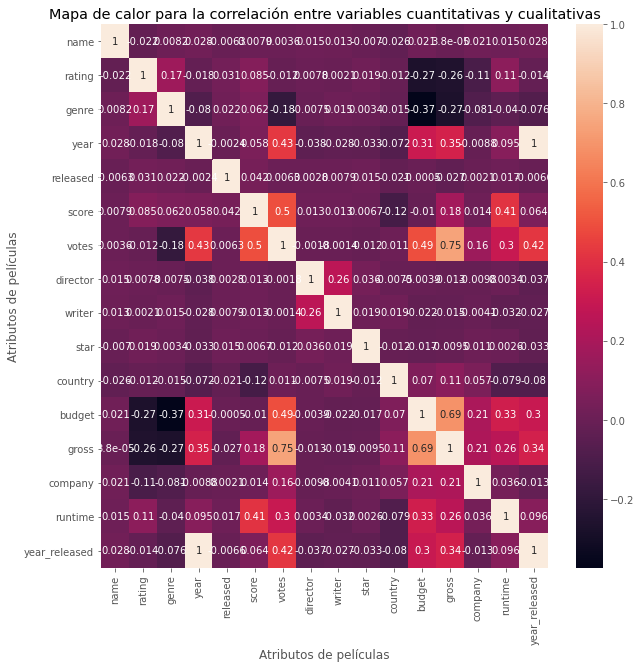

In [63]:
# Generación de mapa de calor para la correlación entre variables cuantitativas y cualitativas
matriz_correlacion_all = df_cat.corr(method='spearman')
sns.heatmap(matriz_correlacion_all, annot=True)
plt.title('Mapa de calor para la correlación entre variables cuantitativas y cualitativas')
plt.xlabel('Atributos de películas')
plt.ylabel('Atributos de películas')
plt.show()

In [75]:
# Obtención de los pares de atributos con la correlación
correlation_matriz = matriz_correlacion_all.unstack().sort_values()
correlation_matriz

genre          budget          -0.372729
budget         genre           -0.372729
genre          gross           -0.268314
gross          genre           -0.268314
budget         rating          -0.267486
rating         budget          -0.267486
               gross           -0.256014
gross          rating          -0.256014
votes          genre           -0.182682
genre          votes           -0.182682
country        score           -0.124916
score          country         -0.124916
company        rating          -0.108557
rating         company         -0.108557
company        genre           -0.080808
genre          company         -0.080808
year_released  country         -0.080466
country        year_released   -0.080466
year           genre           -0.080105
genre          year            -0.080105
country        runtime         -0.078532
runtime        country         -0.078532
genre          year_released   -0.075633
year_released  genre           -0.075633
year           c

In [73]:
correlation_matriz[(correlation_matriz) > 0.5]

budget         gross            0.692958
gross          budget           0.692958
               votes            0.745793
votes          gross            0.745793
year           year_released    0.998694
year_released  year             0.998694
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
year_released  year_released    1.000000
dtype: float64

In [74]:
correlation_matriz[(correlation_matriz) < -0.5]

Series([], dtype: float64)

# Conclusiones del análisis de correlación:

Tras la obtención de las correlaciones para las variables cuantitativas y cualitativas del set de datos para las peliculas en IMBd, podemos concluir que las parejas de atributos que tienen un comportamiento correlacionado son:

- gross y budget: con una correlación de 0.74 --> Esto nos quiere insinuar que existe una relación positiva entre la inversión en una película y los ingresos obtenidos.
- gross y votes: con una correlación de 0.61 --> Nos lleva a pensar que existe una relación positiva entre los ingresos de una película y la cantidad de personas que votan en IMDb.

Además nos puede llevar a establecer que atributos categoricos como la productora, la clasificación o la estrella principal, no nos puedan ayudar a entender los ingresos, la inversión o cualquier otra variable.